<a href="https://colab.research.google.com/github/Chan0226/Neural-Network/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#fashion MNIST 데이터셋
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# fashion_mnist ---> 신경망 입력 형태로 변환
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
# numpy array  행열
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
# 원핫 코드
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
x_train.shape, y_test.shape

((60000, 784), (10000, 10))

In [ ]:
m_input = 784
m_hidden = 1024
m_hidden1 = 512
m_hidden2 = 512
m_hidden3 = 512
m_output = 10

In [ ]:
mlp = Sequential()  # 초기 레이아웃을 잡는거
 # 최초 입력과 히든층을 연결
mlp.add(Dense(units=m_hidden, activation='relu', input_shape = (m_input,),kernel_initializer='random_uniform'))

mlp.add(Dense(units=m_hidden1, activation='relu',kernel_initializer='random_uniform' ))
mlp.add(Dense(units=m_hidden2, activation='relu',kernel_initializer='random_uniform' ))
mlp.add(Dense(units=m_hidden3, activation='relu',kernel_initializer='random_uniform' ))

mlp.add(Dense(units=m_output, activation='relu',kernel_initializer='random_uniform' ))


In [ ]:
mlp.compile(loss = 'mse', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
hist = mlp.fit(x_train,y_train,batch_size=128, epochs=15,validation_data=(x_test,y_test),verbose=2)

Epoch 1/15
469/469 - 6s - loss: 0.0313 - accuracy: 0.7920 - val_loss: 0.0273 - val_accuracy: 0.8097 - 6s/epoch - 13ms/step
Epoch 2/15
469/469 - 3s - loss: 0.0250 - accuracy: 0.8254 - val_loss: 0.0256 - val_accuracy: 0.8226 - 3s/epoch - 6ms/step
Epoch 3/15
469/469 - 3s - loss: 0.0233 - accuracy: 0.8345 - val_loss: 0.0251 - val_accuracy: 0.8224 - 3s/epoch - 6ms/step
Epoch 4/15
469/469 - 3s - loss: 0.0222 - accuracy: 0.8407 - val_loss: 0.0248 - val_accuracy: 0.8285 - 3s/epoch - 6ms/step
Epoch 5/15
469/469 - 3s - loss: 0.0198 - accuracy: 0.8602 - val_loss: 0.0197 - val_accuracy: 0.8643 - 3s/epoch - 6ms/step
Epoch 6/15
469/469 - 3s - loss: 0.0154 - accuracy: 0.8958 - val_loss: 0.0173 - val_accuracy: 0.8816 - 3s/epoch - 6ms/step
Epoch 7/15
469/469 - 3s - loss: 0.0146 - accuracy: 0.9017 - val_loss: 0.0184 - val_accuracy: 0.8769 - 3s/epoch - 6ms/step
Epoch 8/15
469/469 - 3s - loss: 0.0138 - accuracy: 0.9058 - val_loss: 0.0170 - val_accuracy: 0.8860 - 3s/epoch - 6ms/step
Epoch 9/15
469/469 - 3s

In [ ]:
# 469/469 - 5s - loss: 0.0617 - accuracy: 0.4916 - val_loss: 0.0628 - val_accuracy: 0.4870 - 5s/epoch - 12ms/step

In [ ]:
# 정확률 측정
res = mlp.evaluate(x_test,y_test,verbose=2)
res

313/313 - 1s - loss: 0.0169 - accuracy: 0.8867 - 830ms/epoch - 3ms/step


[0.01690460368990898, 0.8866999745368958]

In [ ]:
hist.history

{'accuracy': [0.792033314704895,
  0.8253666758537292,
  0.8345333337783813,
  0.8406500220298767,
  0.8601666688919067,
  0.8958333134651184,
  0.9017166495323181,
  0.9057666659355164,
  0.9111999869346619,
  0.9123333096504211,
  0.9159666895866394,
  0.9188666939735413,
  0.9223833084106445,
  0.9233166575431824,
  0.9283333420753479],
 'loss': [0.03126901760697365,
  0.02502398192882538,
  0.023272642865777016,
  0.022249432280659676,
  0.019767509773373604,
  0.015406981110572815,
  0.014586661010980606,
  0.013840226456522942,
  0.01333420816808939,
  0.013117391616106033,
  0.012498036958277225,
  0.012251977808773518,
  0.011683525517582893,
  0.011498620733618736,
  0.010958600789308548],
 'val_accuracy': [0.8097000122070312,
  0.8226000070571899,
  0.8223999738693237,
  0.828499972820282,
  0.864300012588501,
  0.881600022315979,
  0.8769000172615051,
  0.8859999775886536,
  0.8790000081062317,
  0.8870999813079834,
  0.8889999985694885,
  0.8891000151634216,
  0.89029997587

In [ ]:
# Deep 러닝
# 가중치 초기화하는 방법
# kernel_initializer  : 가중치를 균등한 분포에서 난수를 발생하여 초기화
# kernel_initializer='glorot_uniform'  Glorot2010 제목의 논문에 --> 데이터가 많을때는  glorot_uniform를 사용한다


In [ ]:
# 딥러닝의 대표적인 문제
# 그레디언트 소멸문제 --> 미분이 연속적으로 이루어지므로 기울기가 없는 구간이 발생한다
# --> 활성함수를   기존의 시그모이드에서   Relu 와같은 검증된 할성화 함수를 사용한다.
# 과대적합/과잉적합 --> overfitting
# 차수는 유지하고  훈련데이터를 많이 사용 / 규제기법을 적용
 

In [ ]:
# 손실함수(mse)의 교차엔트로피 성능비교
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist  # 8 by 8 bitmap  손글씨

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train.shape, x_test.shape
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
x_train.shape, x_test.shape
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
x_train.shape, y_test.shape
m_input = 784
m_hidden = 1024
m_hidden1 = 512
m_hidden2 = 512
m_hidden3 = 512
m_output = 10

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 평균 제곱 오차를 사용하는 모델
dmlp_mse =  Sequential()
dmlp_mse.add(Dense(units=m_hidden, activation='tanh',input_shape=(m_input,)))
dmlp_mse.add(Dense(units=m_hidden1, activation='tanh'))
dmlp_mse.add(Dense(units=m_hidden2, activation='tanh'))
dmlp_mse.add(Dense(units=m_hidden3, activation='tanh'))
dmlp_mse.add(Dense(units=m_output, activation='softmax'))
dmlp_mse.compile(loss = 'mean_squared_error', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist_mse = dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)
# 교차 엔트로피를 사용한 모델
dmlp_ce = Sequential()
dmlp_ce.add(Dense(units=m_hidden, activation='tanh',input_shape=(m_input,)))
dmlp_ce.add(Dense(units=m_hidden1, activation='tanh'))
dmlp_ce.add(Dense(units=m_hidden2, activation='tanh'))
dmlp_ce.add(Dense(units=m_hidden3, activation='tanh'))
dmlp_ce.add(Dense(units=m_output, activation='softmax'))
dmlp_ce.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist_ce = dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)


Epoch 1/30
469/469 - 18s - loss: 0.0157 - accuracy: 0.8961 - val_loss: 0.0090 - val_accuracy: 0.9416 - 18s/epoch - 38ms/step
Epoch 2/30
469/469 - 17s - loss: 0.0081 - accuracy: 0.9483 - val_loss: 0.0072 - val_accuracy: 0.9531 - 17s/epoch - 36ms/step
Epoch 3/30
469/469 - 17s - loss: 0.0061 - accuracy: 0.9609 - val_loss: 0.0067 - val_accuracy: 0.9582 - 17s/epoch - 35ms/step
Epoch 4/30
469/469 - 17s - loss: 0.0052 - accuracy: 0.9668 - val_loss: 0.0063 - val_accuracy: 0.9595 - 17s/epoch - 36ms/step
Epoch 5/30
469/469 - 17s - loss: 0.0044 - accuracy: 0.9722 - val_loss: 0.0049 - val_accuracy: 0.9685 - 17s/epoch - 36ms/step
Epoch 6/30
469/469 - 16s - loss: 0.0039 - accuracy: 0.9751 - val_loss: 0.0052 - val_accuracy: 0.9668 - 16s/epoch - 35ms/step
Epoch 7/30
469/469 - 16s - loss: 0.0037 - accuracy: 0.9764 - val_loss: 0.0053 - val_accuracy: 0.9655 - 16s/epoch - 35ms/step
Epoch 8/30
469/469 - 17s - loss: 0.0031 - accuracy: 0.9804 - val_loss: 0.0046 - val_accuracy: 0.9701 - 17s/epoch - 35ms/step


In [ ]:
# 두 모델의 정확률 비교
res_mse =  dmlp_mse.evaluate(x_test,y_test, verbose=0)
print('평균제곱오차의 정확율 : ', res_mse[1])
res_ce =  dmlp_ce.evaluate(x_test,y_test, verbose=0)
print('교차엔트로피 정확율 : ', res_ce[1])


평균제곱오차의 정확율 :  0.9724000096321106
교차엔트로피 정확율 :  0.9761000275611877


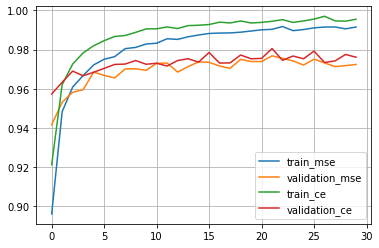

In [ ]:
# 하나의 그래프로 두 모델을 비교
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.legend(['train_mse','validation_mse','train_ce','validation_ce'], loc='best')
plt.grid()
plt.show()